# ДЗ 3. Модуль pandas
Во всех задачах разрешается заводить любые промежуточные переменные, не указанные в условии, которые вам могут понадобиться. Задание сдаётся в систему anytask.

## 1. (3 балла) О велосипедах
Вам дана таблица с данными об аренде велосипедов. Подробное описание колонок можно почитать [здесь](https://archive.ics.uci.edu/ml/datasets/Bike%20Sharing%20Dataset#) (в исходном датасете некоторые величины отнормированы в отрезок $[0; 1]$, в нашей версии датасета -- нет).

В задании могут понадобиться следующие:
- `datetime`: дата аренды
- `season`: сезоны проката, разбиение примерно такое: 
    - 1: декабрь-февраль
    - 2: март-июнь
    - 3: июнь-август
    - 4: сентябрь-декабрь
- `workingday`: являлся ли день рабочим
    - 0: праздники или выходные
    - 1: обычный рабочий день
- `temp`: температура воздуха по Цельсию
- `cnt`: общее число аренд (обычных аренд и аренд по абонементу)
- `yr`: год (0: 2011 год, 1: 2012 год)
- `mnth`: месяц (1-12)

Что надо сделать:
1. считать таблицу;
2. проверить её на наличие пропущенных значений и обработать пропуски;
3. вывести строки, содержащие информацию за летний и зимний сезон (значение поля `season` $3$ и $1$ соответственно);
4. вывести информацию о нерабочих днях, когда температура превышала $10$ градусов;
5. вывести среднее число аренд велосипедов в январе в 2011 году;
6. вывести минимальную и максимальную температуру за апрель и май.

In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

__1.Считать таблицу__

In [2]:
df = pd.read_csv('bikes.csv', encoding='utf-8')
df

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1.0,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2.0,8.175849,7.999250,0.805833,10.749882,331.0,654.0,985.0
1,2.0,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2.0,9.083466,7.346774,0.696087,16.652113,131.0,670.0,801.0
2,3.0,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.229108,-3.499270,0.437273,16.636703,120.0,1229.0,1349.0
3,4.0,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.400000,-1.999948,0.590435,10.739832,108.0,1454.0,1562.0
4,5.0,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1.0,2.666979,-0.868180,0.436957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727.0,2012-12-27,1.0,1.0,12.0,0.0,4.0,1.0,2.0,3.945849,-1.041628,0.652917,23.458911,247.0,1867.0,2114.0
727,728.0,2012-12-28,1.0,1.0,12.0,0.0,5.0,1.0,2.0,3.906651,0.833036,0.590000,10.416557,644.0,2451.0,3095.0
728,729.0,2012-12-29,1.0,1.0,12.0,0.0,6.0,0.0,2.0,3.906651,-0.001600,0.752917,8.333661,159.0,1182.0,1341.0
729,730.0,2012-12-30,1.0,1.0,12.0,0.0,0.0,0.0,1.0,4.024151,-0.707800,0.483333,23.500518,364.0,1432.0,1796.0


In [3]:
print('Размерность таблицы ',df.shape)
df.info()

Размерность таблицы  (731, 16)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     721 non-null    float64
 1   dteday      720 non-null    object 
 2   season      722 non-null    float64
 3   yr          718 non-null    float64
 4   mnth        720 non-null    float64
 5   holiday     729 non-null    float64
 6   weekday     723 non-null    float64
 7   workingday  719 non-null    float64
 8   weathersit  720 non-null    float64
 9   temp        719 non-null    float64
 10  atemp       727 non-null    float64
 11  hum         727 non-null    float64
 12  windspeed   727 non-null    float64
 13  casual      722 non-null    float64
 14  registered  729 non-null    float64
 15  cnt         723 non-null    float64
dtypes: float64(15), object(1)
memory usage: 91.5+ KB


__2. Проверить её на наличие пропущенных значений и обработать пропуски__

In [4]:
def missing_values_table(df):
        mis_val = df.isnull().sum()
        mis_val_percent = 100 * df.isnull().sum() / len(df)
        mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
        mis_val_table_ren_columns = mis_val_table.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        mis_val_table_ren_columns = mis_val_table_ren_columns[
            mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        print ("Selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(mis_val_table_ren_columns.shape[0]) +
              " columns that have missing values.")
        return mis_val_table_ren_columns
missing_values_table(df)

Selected dataframe has 16 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values
yr,13,1.8
workingday,12,1.6
temp,12,1.6
dteday,11,1.5
mnth,11,1.5
weathersit,11,1.5
instant,10,1.4
season,9,1.2
casual,9,1.2
weekday,8,1.1


Столбец `instant` это простая нумерация, поэтому заполним его числами от 1 до 731

In [5]:
instant_col = np.array(range(1, int(df.shape[0]) + 1))
df['instant'] = instant_col

Непонятно чем заполнять пропуски в дате, поэтому выбросим эти 11 наблюдений

In [6]:
drops = df[df['dteday'].isna() == True].index
df.drop(drops, inplace=True)

In [7]:
missing_df = missing_values_table(df);
missing_columns = list(missing_df.index)
missing_columns

Selected dataframe has 16 columns.
There are 14 columns that have missing values.


['yr',
 'workingday',
 'temp',
 'mnth',
 'weathersit',
 'season',
 'weekday',
 'casual',
 'cnt',
 'atemp',
 'hum',
 'windspeed',
 'holiday',
 'registered']

__Так как пропусков не очень много, мы будем заполнять их медианным значением которое подчиняется нормальному распределению со стандартным отклонением 3__

Вообще, можно было бы просто залить пропуски медианным значением по целому столбцу, но мы ж умеем делать красиво. 

Для некоторых полей установим стандартное отклонение в 0.1 , чтобы случайная величина не получалась чересчур большой/маленькой

In [8]:
df.yr[df.yr.isna()] = abs(np.rint(np.random.normal(loc = df.yr.median(),
                                                   scale = 0.1, 
                                                   size = df.yr[df.yr.isna()].shape[0])))
df.workingday[df.workingday.isna()] = abs(np.rint(np.random.normal(loc = df.workingday.median(),
                                                                   scale = 0.1, 
                                                                   size = df.workingday[df.workingday.isna()].shape[0])))
df.temp[df.temp.isna()] = np.random.normal(loc = df.temp.median(), 
                                           scale = 3, 
                                           size = df.temp[df.temp.isna()].shape[0])
df.mnth[df.mnth.isna()] = abs(np.rint(np.random.normal(loc = df.mnth.median(), 
                                                       scale = 1, 
                                                       size = df.mnth[df.mnth.isna()].shape[0])))
df.weathersit[df.weathersit.isna()] = abs(np.rint(np.random.normal(loc = df.weathersit.median(),
                                                                   scale = 0.1, 
                                                                   size = df.weathersit[df.weathersit.isna()].shape[0])))
df.season[df.season.isna()] = abs(np.rint(np.random.normal(loc = df.season.median(), 
                                                           scale = 0.1, 
                                                           size = df.season[df.season.isna()].shape[0])))
df.casual[df.casual.isna()] = np.random.normal(loc = df.casual.median(), 
                                               scale = 3, 
                                               size = df.casual[df.casual.isna()].shape[0])
df.weekday[df.weekday.isna()] = abs(np.rint(np.random.normal(loc = df.weekday.median(), 
                                                             scale = 0.1, 
                                                             size = df.weekday[df.weekday.isna()].shape[0])))
df.cnt[df.cnt.isna()] = np.random.normal(loc = df.cnt.median(),
                                         scale = 3, 
                                         size = df.cnt[df.cnt.isna()].shape[0])
df.atemp[df.atemp.isna()] = np.random.normal(loc = df.atemp.median(),
                                             scale = 3, 
                                             size = df.atemp[df.atemp.isna()].shape[0])
df.hum[df.hum.isna()] = np.random.normal(loc = df.hum.median(), 
                                         scale = 3, 
                                         size = df.hum[df.hum.isna()].shape[0])
df.windspeed[df.windspeed.isna()] = np.random.normal(loc = df.windspeed.median(),
                                                     scale = 3, 
                                                     size = df.windspeed[df.windspeed.isna()].shape[0])
df.holiday[df.holiday.isna()] = abs(np.rint(np.random.normal(loc = df.holiday.median(), 
                                                             scale = 0.1, 
                                                             size = df.holiday[df.holiday.isna()].shape[0])))
df.registered[df.registered.isna()] = np.random.normal(loc = df.registered.median(), 
                                                       scale = 3, 
                                                       size = df.registered[df.registered.isna()].shape[0])

In [9]:
df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2.0,8.175849,7.999250,0.805833,10.749882,331.0,654.0,985.0
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2.0,9.083466,7.346774,0.696087,16.652113,131.0,670.0,801.0
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.229108,-3.499270,0.437273,16.636703,120.0,1229.0,1349.0
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.400000,-1.999948,0.590435,10.739832,108.0,1454.0,1562.0
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1.0,2.666979,-0.868180,0.436957,12.522300,82.0,1518.0,1600.0


__3. Вывести строки, содержащие информацию за летний и зимний сезон (значение поля `season` $3$ и $1$ соответственно)__

In [10]:
df[(df['season'] == 3 ) | (df['season'] == 1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2.0,8.175849,7.999250,0.805833,10.749882,331.0,654.0,985.0
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2.0,9.083466,7.346774,0.696087,16.652113,131.0,670.0,801.0
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.229108,-3.499270,0.437273,16.636703,120.0,1229.0,1349.0
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.400000,-1.999948,0.590435,10.739832,108.0,1454.0,1562.0
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1.0,2.666979,-0.868180,0.436957,12.522300,82.0,1518.0,1600.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
726,727,2012-12-27,1.0,1.0,12.0,0.0,4.0,1.0,2.0,3.945849,-1.041628,0.652917,23.458911,247.0,1867.0,2114.0
727,728,2012-12-28,1.0,1.0,12.0,0.0,5.0,1.0,2.0,3.906651,0.833036,0.590000,10.416557,644.0,2451.0,3095.0
728,729,2012-12-29,1.0,1.0,12.0,0.0,6.0,0.0,2.0,3.906651,-0.001600,0.752917,8.333661,159.0,1182.0,1341.0
729,730,2012-12-30,1.0,1.0,12.0,0.0,0.0,0.0,1.0,4.024151,-0.707800,0.483333,23.500518,364.0,1432.0,1796.0


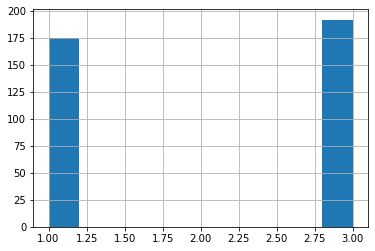

In [11]:
df.season[(df['season'] == 3 )| (df['season'] == 1)].hist();

__4. Вывести информацию о нерабочих днях, когда температура превышала $10$ градусов__

In [12]:
df[(df['temp'] > 10 ) & (df['workingday'] == 0)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
49,50,2011-02-19,1.0,0.0,2.0,0.0,6.0,0.0,1.0,10.760849,9.832664,0.187917,34.000021,532.0,1103.0,1635.000000
63,64,2011-03-05,1.0,0.0,3.0,0.0,6.0,0.0,2.0,10.055849,8.999414,0.789167,16.875357,640.0,1437.0,2077.000000
71,72,2011-03-13,1.0,0.0,3.0,0.0,0.0,0.0,1.0,10.064356,9.086006,0.527391,18.130468,982.0,1435.0,2417.000000
77,78,2011-03-19,1.0,0.0,3.0,0.0,6.0,0.0,1.0,14.207500,14.790650,0.379167,24.667189,1424.0,1693.0,4539.471708
99,100,2011-04-10,2.0,0.0,4.0,0.0,0.0,0.0,2.0,12.053349,12.164642,0.857500,9.833389,1188.0,1707.0,2895.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
679,680,2012-11-10,4.0,1.0,11.0,0.0,6.0,0.0,1.0,10.290849,9.999842,0.645417,3.875669,2090.0,4446.0,6536.000000
680,681,2012-11-11,4.0,1.0,11.0,0.0,0.0,0.0,1.0,11.779151,11.833058,0.659167,8.542500,2290.0,4562.0,6852.000000
681,682,2012-11-12,4.0,1.0,11.0,1.0,1.0,0.0,1.0,14.795000,15.375278,0.741667,11.625639,1097.0,5172.0,6269.000000
708,709,2012-12-09,4.0,1.0,12.0,0.0,0.0,0.0,2.0,10.055849,9.749636,0.905417,10.584325,441.0,2787.0,3228.000000


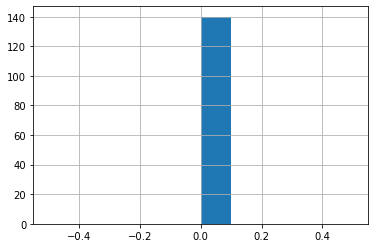

In [13]:
df.workingday[(df['temp'] > 10 ) & (df['workingday'] == 0)].hist();

__5. Вывести среднее число аренд велосипедов в январе в 2011 году__

In [14]:
import datetime as dt
df["dteday"] = df["dteday"].astype("datetime64")
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 720 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     720 non-null    int32         
 1   dteday      720 non-null    datetime64[ns]
 2   season      720 non-null    float64       
 3   yr          720 non-null    float64       
 4   mnth        720 non-null    float64       
 5   holiday     720 non-null    float64       
 6   weekday     720 non-null    float64       
 7   workingday  720 non-null    float64       
 8   weathersit  720 non-null    float64       
 9   temp        720 non-null    float64       
 10  atemp       720 non-null    float64       
 11  hum         720 non-null    float64       
 12  windspeed   720 non-null    float64       
 13  casual      720 non-null    float64       
 14  registered  720 non-null    float64       
 15  cnt         720 non-null    float64       
dtypes: datetime64[ns](1), floa

In [15]:
df[(df['dteday'].dt.year == 2011)&(df['dteday'].dt.month == 1)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1.0,0.0,1.0,0.0,6.0,0.0,2.0,8.175849,7.999250,0.805833,10.749882,331.0,654.0,985.0
1,2,2011-01-02,1.0,0.0,1.0,0.0,0.0,0.0,2.0,9.083466,7.346774,0.696087,16.652113,131.0,670.0,801.0
2,3,2011-01-03,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.229108,-3.499270,0.437273,16.636703,120.0,1229.0,1349.0
3,4,2011-01-04,1.0,0.0,1.0,0.0,2.0,1.0,1.0,1.400000,-1.999948,0.590435,10.739832,108.0,1454.0,1562.0
4,5,2011-01-05,1.0,0.0,1.0,0.0,3.0,1.0,1.0,2.666979,-0.868180,0.436957,12.522300,82.0,1518.0,1600.0
5,6,2011-01-06,1.0,0.0,1.0,0.0,4.0,1.0,1.0,1.604356,-0.608206,0.518261,6.000868,88.0,1518.0,1606.0
7,8,2011-01-08,1.0,0.0,1.0,0.0,6.0,0.0,2.0,-0.245000,-5.291236,0.535833,17.875868,68.0,891.0,959.0
8,9,2011-01-09,1.0,0.0,1.0,0.0,0.0,0.0,1.0,-1.498349,-8.332450,0.434167,24.250650,54.0,768.0,822.0
9,10,2011-01-10,1.0,0.0,1.0,0.0,1.0,1.0,1.0,-0.910849,-6.041392,0.482917,14.958889,41.0,1280.0,1321.0
10,11,2011-01-11,1.0,0.0,1.0,0.0,2.0,1.0,2.0,-0.052723,-3.363376,0.686364,8.182844,43.0,1220.0,1263.0


In [16]:
print(f"Average bike ordering quantity is {round(df.cnt[(df['dteday'].dt.year == 2011)&(df['dteday'].dt.month == 1)].mean(),1)}")

Average bike ordering quantity is 1222.6


__6. Вывести минимальную и максимальную температуру за апрель и май__

In [17]:
df[(df['dteday'].dt.month == 4)|(df['dteday'].dt.month == 5)]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
90,91,2011-04-01,2.0,0.0,4.0,0.0,5.0,1.0,2.0,6.100000,2.707964,0.686250,17.333436,307.000000,1920.0,2227.000000
91,92,2011-04-02,2.0,0.0,4.0,0.0,6.0,0.0,2.0,6.805000,4.832042,0.653750,13.208782,898.000000,1354.0,2252.000000
92,93,2011-04-03,2.0,0.0,4.0,0.0,3.0,0.0,1.0,9.781651,8.998622,0.480000,12.208271,1651.000000,1598.0,3249.000000
93,94,2011-04-04,2.0,1.0,4.0,0.0,1.0,1.0,1.0,18.946651,19.833314,0.426250,25.833257,734.000000,2381.0,3115.000000
94,95,2011-04-05,2.0,0.0,4.0,0.0,2.0,1.0,2.0,11.465849,10.291100,0.642083,26.000489,167.000000,1628.0,1795.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,513,2012-05-27,2.0,1.0,5.0,0.0,0.0,0.0,1.0,24.430000,26.334050,0.697083,14.416457,3283.000000,3308.0,6591.000000
513,514,2012-05-28,2.0,1.0,5.0,1.0,1.0,0.0,1.0,25.487500,28.833800,0.676250,13.166907,2557.000000,3486.0,6043.000000
514,515,2012-05-29,2.0,1.0,5.0,0.0,2.0,1.0,1.0,25.957500,28.417472,0.684583,19.791800,880.000000,4863.0,5743.000000
515,516,2012-05-30,2.0,1.0,5.0,0.0,3.0,1.0,2.0,22.863349,24.334514,0.670000,9.000043,709.070147,6110.0,6855.000000


In [18]:
print(f"Minimum temperature during april and may is {round(min(df.temp[(df['dteday'].dt.month == 4)|(df['dteday'].dt.month == 5)]), 1)}")
print(f"Maximum temperature during april and may is {round(max(df.temp[(df['dteday'].dt.month == 4)|(df['dteday'].dt.month == 5)]), 1)}")

Minimum temperature during april and may is 6.1
Maximum temperature during april and may is 28.4
